# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coeeficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  

Instead we would like to take an interative approach called **gradient descent**.



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of . For the kind of regression problems we've been examining, the resulting plot of loss vs.  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function


<img src='./resources/gdformula.png' width=500 />




### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />

We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

### Number of Epochs 

Epochs is anoter hyperparamenter you can 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [3]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [4]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [10]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

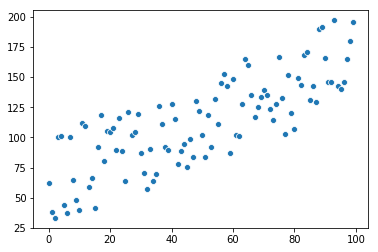

In [11]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 981.911102
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 836.636013
[1.9094594  1.66605633]
Iteration 2 | Cost: 771.102301
[1.91231422 1.75455688]
Iteration 3 | Cost: 741.533024
[1.91473068 1.81398415]
Iteration 4 | Cost: 728.184194
[1.91685274 1.85388651]
Iteration 5 | Cost: 722.151005
[1.91877707 1.88067643]
Iteration 6 | Cost: 719.417268
[1.92056859 1.89866035]
Iteration 7 | Cost: 718.171630
[1.92227091 1.91073038]
Iteration 8 | Cost: 717.597145
[1.92391332 1.91882879]
Iteration 9 | Cost: 717.325360
[1.92551548 1.92425996]
Iteration 10 | Cost: 717.190097
[1.92709059 1.92789988]
Iteration 11 | Cost: 717.116408
[1.92864753 1.93033683]
Iteration 12 | Cost: 717.070490
[1.93019224 1.9319659 ]
Iteration 13 | Cost: 717.037099
[1.93172874 1.93305242]
Iteration 14 | Cost: 717.009357
[1.93325971 1.93377457]
Iteration 15 | Cost: 716.984164
[1.93478695 1.93425203]
Iteration 16 | Cost: 716.960122
[1.93631168 1.93456515]
Iteration 17 | Cost: 716.936599
[1.9378347  1.93476792]
It

Iteration 491 | Cost: 706.118980
[2.65381817 1.92443493]
Iteration 492 | Cost: 706.096432
[2.65531958 1.9244123 ]
Iteration 493 | Cost: 706.073886
[2.65682096 1.92438966]
Iteration 494 | Cost: 706.051341
[2.6583223  1.92436703]
Iteration 495 | Cost: 706.028797
[2.6598236  1.92434439]
Iteration 496 | Cost: 706.006255
[2.66132487 1.92432176]
Iteration 497 | Cost: 705.983713
[2.66282609 1.92429912]
Iteration 498 | Cost: 705.961173
[2.66432728 1.92427649]
Iteration 499 | Cost: 705.938633
[2.66582843 1.92425386]
Iteration 500 | Cost: 705.916095
[2.66732954 1.92423123]
Iteration 501 | Cost: 705.893558
[2.66883061 1.9242086 ]
Iteration 502 | Cost: 705.871022
[2.67033164 1.92418597]
Iteration 503 | Cost: 705.848487
[2.67183264 1.92416334]
Iteration 504 | Cost: 705.825954
[2.6733336  1.92414071]
Iteration 505 | Cost: 705.803421
[2.67483452 1.92411808]
Iteration 506 | Cost: 705.780890
[2.6763354  1.92409545]
Iteration 507 | Cost: 705.758360
[2.67783625 1.92407282]
Iteration 508 | Cost: 705.73583

[3.19633681 1.91625563]
Iteration 855 | Cost: 697.986879
[3.19782446 1.9162332 ]
Iteration 856 | Cost: 697.964745
[3.19931207 1.91621077]
Iteration 857 | Cost: 697.942611
[3.20079965 1.91618834]
Iteration 858 | Cost: 697.920479
[3.20228718 1.91616592]
Iteration 859 | Cost: 697.898347
[3.20377468 1.91614349]
Iteration 860 | Cost: 697.876217
[3.20526215 1.91612106]
Iteration 861 | Cost: 697.854088
[3.20674957 1.91609864]
Iteration 862 | Cost: 697.831960
[3.20823696 1.91607621]
Iteration 863 | Cost: 697.809833
[3.20972431 1.91605379]
Iteration 864 | Cost: 697.787707
[3.21121162 1.91603137]
Iteration 865 | Cost: 697.765583
[3.21269889 1.91600894]
Iteration 866 | Cost: 697.743459
[3.21418613 1.91598652]
Iteration 867 | Cost: 697.721337
[3.21567333 1.9159641 ]
Iteration 868 | Cost: 697.699216
[3.21716049 1.91594168]
Iteration 869 | Cost: 697.677096
[3.21864761 1.91591926]
Iteration 870 | Cost: 697.654977
[3.22013469 1.91589684]
Iteration 871 | Cost: 697.632859
[3.22162174 1.91587442]
Iterati

Iteration 1241 | Cost: 689.525807
[3.76924787 1.90761811]
Iteration 1242 | Cost: 689.504101
[3.77072098 1.9075959 ]
Iteration 1243 | Cost: 689.482397
[3.77219406 1.90757369]
Iteration 1244 | Cost: 689.460694
[3.7736671  1.90755148]
Iteration 1245 | Cost: 689.438992
[3.77514011 1.90752928]
Iteration 1246 | Cost: 689.417291
[3.77661307 1.90750707]
Iteration 1247 | Cost: 689.395591
[3.778086   1.90748486]
Iteration 1248 | Cost: 689.373892
[3.77955889 1.90746266]
Iteration 1249 | Cost: 689.352195
[3.78103175 1.90744045]
Iteration 1250 | Cost: 689.330498
[3.78250456 1.90741824]
Iteration 1251 | Cost: 689.308803
[3.78397734 1.90739604]
Iteration 1252 | Cost: 689.287108
[3.78545008 1.90737384]
Iteration 1253 | Cost: 689.265415
[3.78692279 1.90735163]
Iteration 1254 | Cost: 689.243723
[3.78839546 1.90732943]
Iteration 1255 | Cost: 689.222032
[3.78986809 1.90730723]
Iteration 1256 | Cost: 689.200342
[3.79134068 1.90728503]
Iteration 1257 | Cost: 689.178653
[3.79281323 1.90726283]
Iteration 1258

[4.31029785 1.89946095]
Iteration 1611 | Cost: 681.569543
[4.31175724 1.89943894]
Iteration 1612 | Cost: 681.548242
[4.31321659 1.89941694]
Iteration 1613 | Cost: 681.526941
[4.31467591 1.89939494]
Iteration 1614 | Cost: 681.505642
[4.31613519 1.89937294]
Iteration 1615 | Cost: 681.484343
[4.31759443 1.89935094]
Iteration 1616 | Cost: 681.463046
[4.31905363 1.89932894]
Iteration 1617 | Cost: 681.441750
[4.3205128  1.89930694]
Iteration 1618 | Cost: 681.420454
[4.32197193 1.89928494]
Iteration 1619 | Cost: 681.399160
[4.32343102 1.89926294]
Iteration 1620 | Cost: 681.377867
[4.32489007 1.89924095]
Iteration 1621 | Cost: 681.356575
[4.32634909 1.89921895]
Iteration 1622 | Cost: 681.335285
[4.32780807 1.89919695]
Iteration 1623 | Cost: 681.313995
[4.32926702 1.89917496]
Iteration 1624 | Cost: 681.292706
[4.33072593 1.89915296]
Iteration 1625 | Cost: 681.271419
[4.3321848  1.89913097]
Iteration 1626 | Cost: 681.250132
[4.33364363 1.89910897]
Iteration 1627 | Cost: 681.228847
[4.33510243 1.

[4.87087957 1.89100931]
Iteration 1997 | Cost: 673.426904
[4.87232473 1.89098753]
Iteration 1998 | Cost: 673.406016
[4.87376986 1.89096574]
Iteration 1999 | Cost: 673.385128
[4.87521496 1.89094395]
Iteration 2000 | Cost: 673.364242
[4.87666001 1.89092216]
Iteration 2001 | Cost: 673.343357
[4.87810503 1.89090038]
Iteration 2002 | Cost: 673.322472
[4.87955002 1.89087859]
Iteration 2003 | Cost: 673.301589
[4.88099496 1.89085681]
Iteration 2004 | Cost: 673.280707
[4.88243987 1.89083502]
Iteration 2005 | Cost: 673.259826
[4.88388474 1.89081324]
Iteration 2006 | Cost: 673.238946
[4.88532958 1.89079146]
Iteration 2007 | Cost: 673.218067
[4.88677438 1.89076967]
Iteration 2008 | Cost: 673.197189
[4.88821914 1.89074789]
Iteration 2009 | Cost: 673.176312
[4.88966387 1.89072611]
Iteration 2010 | Cost: 673.155437
[4.89110856 1.89070433]
Iteration 2011 | Cost: 673.134562
[4.89255321 1.89068255]
Iteration 2012 | Cost: 673.113688
[4.89399783 1.89066077]
Iteration 2013 | Cost: 673.092816
[4.89544241 1.

[5.41168527 1.88285583]
Iteration 2373 | Cost: 665.647092
[5.41311672 1.88283425]
Iteration 2374 | Cost: 665.626598
[5.41454813 1.88281267]
Iteration 2375 | Cost: 665.606105
[5.4159795  1.88279109]
Iteration 2376 | Cost: 665.585614
[5.41741084 1.88276951]
Iteration 2377 | Cost: 665.565123
[5.41884214 1.88274793]
Iteration 2378 | Cost: 665.544633
[5.4202734  1.88272635]
Iteration 2379 | Cost: 665.524145
[5.42170463 1.88270478]
Iteration 2380 | Cost: 665.503657
[5.42313582 1.8826832 ]
Iteration 2381 | Cost: 665.483171
[5.42456697 1.88266162]
Iteration 2382 | Cost: 665.462686
[5.42599809 1.88264005]
Iteration 2383 | Cost: 665.442201
[5.42742917 1.88261847]
Iteration 2384 | Cost: 665.421718
[5.42886022 1.88259689]
Iteration 2385 | Cost: 665.401236
[5.43029123 1.88257532]
Iteration 2386 | Cost: 665.380754
[5.4317222  1.88255375]
Iteration 2387 | Cost: 665.360274
[5.43315314 1.88253217]
Iteration 2388 | Cost: 665.339795
[5.43458404 1.8825106 ]
Iteration 2389 | Cost: 665.319317
[5.4360149  1.

[6.09603491 1.87253821]
Iteration 2854 | Cost: 655.908693
[6.09744899 1.87251689]
Iteration 2855 | Cost: 655.888693
[6.09886304 1.87249557]
Iteration 2856 | Cost: 655.868695
[6.10027705 1.87247425]
Iteration 2857 | Cost: 655.848697
[6.10169102 1.87245293]
Iteration 2858 | Cost: 655.828701
[6.10310496 1.87243162]
Iteration 2859 | Cost: 655.808705
[6.10451887 1.8724103 ]
Iteration 2860 | Cost: 655.788711
[6.10593273 1.87238898]
Iteration 2861 | Cost: 655.768717
[6.10734657 1.87236767]
Iteration 2862 | Cost: 655.748725
[6.10876036 1.87234635]
Iteration 2863 | Cost: 655.728733
[6.11017412 1.87232504]
Iteration 2864 | Cost: 655.708743
[6.11158784 1.87230372]
Iteration 2865 | Cost: 655.688753
[6.11300153 1.87228241]
Iteration 2866 | Cost: 655.668765
[6.11441518 1.8722611 ]
Iteration 2867 | Cost: 655.648778
[6.1158288  1.87223978]
Iteration 2868 | Cost: 655.628791
[6.11724238 1.87221847]
Iteration 2869 | Cost: 655.608806
[6.11865593 1.87219716]
Iteration 2870 | Cost: 655.588821
[6.12006943 1.

Iteration 3277 | Cost: 647.538807
[6.69240008 1.86354708]
Iteration 3278 | Cost: 647.519232
[6.69379903 1.86352599]
Iteration 3279 | Cost: 647.499659
[6.69519795 1.8635049 ]
Iteration 3280 | Cost: 647.480086
[6.69659683 1.86348381]
Iteration 3281 | Cost: 647.460514
[6.69799567 1.86346272]
Iteration 3282 | Cost: 647.440943
[6.69939448 1.86344163]
Iteration 3283 | Cost: 647.421373
[6.70079326 1.86342054]
Iteration 3284 | Cost: 647.401804
[6.702192   1.86339945]
Iteration 3285 | Cost: 647.382236
[6.7035907  1.86337837]
Iteration 3286 | Cost: 647.362669
[6.70498937 1.86335728]
Iteration 3287 | Cost: 647.343103
[6.706388   1.86333619]
Iteration 3288 | Cost: 647.323538
[6.7077866  1.86331511]
Iteration 3289 | Cost: 647.303974
[6.70918516 1.86329402]
Iteration 3290 | Cost: 647.284412
[6.71058369 1.86327294]
Iteration 3291 | Cost: 647.264850
[6.71198218 1.86325185]
Iteration 3292 | Cost: 647.245289
[6.71338063 1.86323077]
Iteration 3293 | Cost: 647.225729
[6.71477905 1.86320969]
Iteration 3294

Iteration 3622 | Cost: 640.844077
[7.1729385  1.85630223]
Iteration 3623 | Cost: 640.824842
[7.17432526 1.85628132]
Iteration 3624 | Cost: 640.805607
[7.17571199 1.85626041]
Iteration 3625 | Cost: 640.786374
[7.17709868 1.8562395 ]
Iteration 3626 | Cost: 640.767142
[7.17848533 1.8562186 ]
Iteration 3627 | Cost: 640.747911
[7.17987195 1.85619769]
Iteration 3628 | Cost: 640.728680
[7.18125853 1.85617679]
Iteration 3629 | Cost: 640.709451
[7.18264508 1.85615588]
Iteration 3630 | Cost: 640.690223
[7.1840316  1.85613498]
Iteration 3631 | Cost: 640.670995
[7.18541808 1.85611408]
Iteration 3632 | Cost: 640.651769
[7.18680452 1.85609317]
Iteration 3633 | Cost: 640.632543
[7.18819093 1.85607227]
Iteration 3634 | Cost: 640.613319
[7.1895773  1.85605137]
Iteration 3635 | Cost: 640.594096
[7.19096364 1.85603047]
Iteration 3636 | Cost: 640.574873
[7.19234994 1.85600957]
Iteration 3637 | Cost: 640.555652
[7.19373621 1.85598867]
Iteration 3638 | Cost: 640.536431
[7.19512244 1.85596777]
Iteration 3639

Iteration 4087 | Cost: 632.004197
[7.81400125 1.84663722]
Iteration 4088 | Cost: 631.985410
[7.81537175 1.84661655]
Iteration 4089 | Cost: 631.966624
[7.81674221 1.84659589]
Iteration 4090 | Cost: 631.947840
[7.81811264 1.84657523]
Iteration 4091 | Cost: 631.929056
[7.81948303 1.84655457]
Iteration 4092 | Cost: 631.910273
[7.82085339 1.84653391]
Iteration 4093 | Cost: 631.891491
[7.82222371 1.84651325]
Iteration 4094 | Cost: 631.872710
[7.82359399 1.84649259]
Iteration 4095 | Cost: 631.853930
[7.82496425 1.84647193]
Iteration 4096 | Cost: 631.835151
[7.82633446 1.84645127]
Iteration 4097 | Cost: 631.816373
[7.82770465 1.84643062]
Iteration 4098 | Cost: 631.797596
[7.8290748  1.84640996]
Iteration 4099 | Cost: 631.778820
[7.83044491 1.8463893 ]
Iteration 4100 | Cost: 631.760045
[7.83181499 1.84636865]
Iteration 4101 | Cost: 631.741271
[7.83318503 1.84634799]
Iteration 4102 | Cost: 631.722497
[7.83455504 1.84632734]
Iteration 4103 | Cost: 631.703725
[7.83592502 1.84630668]
Iteration 4104

Iteration 4488 | Cost: 624.546701
[8.36079084 1.83839352]
Iteration 4489 | Cost: 624.528292
[8.36214746 1.83837307]
Iteration 4490 | Cost: 624.509885
[8.36350405 1.83835261]
Iteration 4491 | Cost: 624.491479
[8.3648606  1.83833216]
Iteration 4492 | Cost: 624.473073
[8.36621712 1.83831171]
Iteration 4493 | Cost: 624.454669
[8.36757361 1.83829126]
Iteration 4494 | Cost: 624.436265
[8.36893006 1.83827081]
Iteration 4495 | Cost: 624.417863
[8.37028648 1.83825036]
Iteration 4496 | Cost: 624.399461
[8.37164286 1.83822991]
Iteration 4497 | Cost: 624.381060
[8.37299921 1.83820946]
Iteration 4498 | Cost: 624.362660
[8.37435552 1.83818901]
Iteration 4499 | Cost: 624.344262
[8.3757118  1.83816856]
Iteration 4500 | Cost: 624.325864
[8.37706804 1.83814812]
Iteration 4501 | Cost: 624.307467
[8.37842425 1.83812767]
Iteration 4502 | Cost: 624.289071
[8.37978043 1.83810722]
Iteration 4503 | Cost: 624.270675
[8.38113657 1.83808678]
Iteration 4504 | Cost: 624.252281
[8.38249268 1.83806633]
Iteration 4505

Iteration 4921 | Cost: 616.662671
[8.94500123 1.82958565]
Iteration 4922 | Cost: 616.644663
[8.94634303 1.82956542]
Iteration 4923 | Cost: 616.626656
[8.9476848  1.82954519]
Iteration 4924 | Cost: 616.608650
[8.94902653 1.82952496]
Iteration 4925 | Cost: 616.590644
[8.95036823 1.82950473]
Iteration 4926 | Cost: 616.572640
[8.9517099 1.8294845]
Iteration 4927 | Cost: 616.554636
[8.95305153 1.82946428]
Iteration 4928 | Cost: 616.536633
[8.95439312 1.82944405]
Iteration 4929 | Cost: 616.518632
[8.95573469 1.82942382]
Iteration 4930 | Cost: 616.500631
[8.95707621 1.8294036 ]
Iteration 4931 | Cost: 616.482631
[8.95841771 1.82938337]
Iteration 4932 | Cost: 616.464632
[8.95975917 1.82936315]
Iteration 4933 | Cost: 616.446634
[8.9611006  1.82934292]
Iteration 4934 | Cost: 616.428636
[8.96244199 1.8293227 ]
Iteration 4935 | Cost: 616.410640
[8.96378335 1.82930248]
Iteration 4936 | Cost: 616.392645
[8.96512467 1.82928226]
Iteration 4937 | Cost: 616.374650
[8.96646596 1.82926203]
Iteration 4938 |

Iteration 5352 | Cost: 608.985215
[9.52017433 1.82091403]
Iteration 5353 | Cost: 608.967596
[9.52150154 1.82089402]
Iteration 5354 | Cost: 608.949978
[9.52282871 1.82087401]
Iteration 5355 | Cost: 608.932361
[9.52415585 1.820854  ]
Iteration 5356 | Cost: 608.914746
[9.52548296 1.82083399]
Iteration 5357 | Cost: 608.897131
[9.52681003 1.82081398]
Iteration 5358 | Cost: 608.879516
[9.52813707 1.82079398]
Iteration 5359 | Cost: 608.861903
[9.52946408 1.82077397]
Iteration 5360 | Cost: 608.844291
[9.53079105 1.82075396]
Iteration 5361 | Cost: 608.826679
[9.53211799 1.82073396]
Iteration 5362 | Cost: 608.809069
[9.5334449  1.82071395]
Iteration 5363 | Cost: 608.791459
[9.53477177 1.82069395]
Iteration 5364 | Cost: 608.773850
[9.53609861 1.82067394]
Iteration 5365 | Cost: 608.756242
[9.53742541 1.82065394]
Iteration 5366 | Cost: 608.738636
[9.53875218 1.82063394]
Iteration 5367 | Cost: 608.721029
[9.54007892 1.82061393]
Iteration 5368 | Cost: 608.703424
[9.54140562 1.82059393]
Iteration 5369

Iteration 5819 | Cost: 600.853844
[10.13633101  1.81162451]
Iteration 5820 | Cost: 600.836638
[10.13764259  1.81160474]
Iteration 5821 | Cost: 600.819433
[10.13895413  1.81158497]
Iteration 5822 | Cost: 600.802229
[10.14026564  1.81156519]
Iteration 5823 | Cost: 600.785026
[10.14157712  1.81154542]
Iteration 5824 | Cost: 600.767823
[10.14288856  1.81152565]
Iteration 5825 | Cost: 600.750622
[10.14419997  1.81150588]
Iteration 5826 | Cost: 600.733421
[10.14551135  1.81148611]
Iteration 5827 | Cost: 600.716221
[10.14682269  1.81146634]
Iteration 5828 | Cost: 600.699022
[10.148134    1.81144657]
Iteration 5829 | Cost: 600.681824
[10.14944527  1.8114268 ]
Iteration 5830 | Cost: 600.664626
[10.15075652  1.81140703]
Iteration 5831 | Cost: 600.647430
[10.15206773  1.81138726]
Iteration 5832 | Cost: 600.630235
[10.1533789   1.81136749]
Iteration 5833 | Cost: 600.613040
[10.15469005  1.81134772]
Iteration 5834 | Cost: 600.595846
[10.15600116  1.81132796]
Iteration 5835 | Cost: 600.578653
[10.15

Iteration 6303 | Cost: 592.627362
[10.76725996  1.80211229]
Iteration 6304 | Cost: 592.610573
[10.76855553  1.80209275]
Iteration 6305 | Cost: 592.593785
[10.76985107  1.80207322]
Iteration 6306 | Cost: 592.576998
[10.77114657  1.80205369]
Iteration 6307 | Cost: 592.560212
[10.77244204  1.80203416]
Iteration 6308 | Cost: 592.543427
[10.77373748  1.80201463]
Iteration 6309 | Cost: 592.526643
[10.77503288  1.8019951 ]
Iteration 6310 | Cost: 592.509859
[10.77632825  1.80197557]
Iteration 6311 | Cost: 592.493077
[10.77762359  1.80195604]
Iteration 6312 | Cost: 592.476295
[10.77891889  1.80193651]
Iteration 6313 | Cost: 592.459514
[10.78021417  1.80191698]
Iteration 6314 | Cost: 592.442734
[10.78150941  1.80189746]
Iteration 6315 | Cost: 592.425955
[10.78280461  1.80187793]
Iteration 6316 | Cost: 592.409177
[10.78409979  1.8018584 ]
Iteration 6317 | Cost: 592.392399
[10.78539493  1.80183888]
Iteration 6318 | Cost: 592.375622
[10.78669004  1.80181935]
Iteration 6319 | Cost: 592.358847
[10.78

[11.28287309  1.79433862]
Iteration 6704 | Cost: 585.963004
[11.28415558  1.79431929]
Iteration 6705 | Cost: 585.946554
[11.28543803  1.79429995]
Iteration 6706 | Cost: 585.930104
[11.28672045  1.79428062]
Iteration 6707 | Cost: 585.913656
[11.28800284  1.79426129]
Iteration 6708 | Cost: 585.897208
[11.2892852   1.79424195]
Iteration 6709 | Cost: 585.880761
[11.29056752  1.79422262]
Iteration 6710 | Cost: 585.864314
[11.29184981  1.79420329]
Iteration 6711 | Cost: 585.847869
[11.29313207  1.79418395]
Iteration 6712 | Cost: 585.831425
[11.2944143   1.79416462]
Iteration 6713 | Cost: 585.814981
[11.29569649  1.79414529]
Iteration 6714 | Cost: 585.798538
[11.29697865  1.79412596]
Iteration 6715 | Cost: 585.782096
[11.29826078  1.79410663]
Iteration 6716 | Cost: 585.765655
[11.29954288  1.7940873 ]
Iteration 6717 | Cost: 585.749214
[11.30082494  1.79406797]
Iteration 6718 | Cost: 585.732775
[11.30210697  1.79404864]
Iteration 6719 | Cost: 585.716336
[11.30338897  1.79402932]
Iteration 6720

Iteration 7101 | Cost: 579.497367
[11.79074077  1.78668174]
Iteration 7102 | Cost: 579.481245
[11.79201037  1.7866626 ]
Iteration 7103 | Cost: 579.465123
[11.79327994  1.78664345]
Iteration 7104 | Cost: 579.449003
[11.79454947  1.78662431]
Iteration 7105 | Cost: 579.432883
[11.79581898  1.78660517]
Iteration 7106 | Cost: 579.416764
[11.79708845  1.78658604]
Iteration 7107 | Cost: 579.400645
[11.79835789  1.7865669 ]
Iteration 7108 | Cost: 579.384528
[11.7996273   1.78654776]
Iteration 7109 | Cost: 579.368411
[11.80089668  1.78652862]
Iteration 7110 | Cost: 579.352296
[11.80216602  1.78650948]
Iteration 7111 | Cost: 579.336181
[11.80343533  1.78649035]
Iteration 7112 | Cost: 579.320066
[11.80470461  1.78647121]
Iteration 7113 | Cost: 579.303953
[11.80597386  1.78645207]
Iteration 7114 | Cost: 579.287841
[11.80724307  1.78643294]
Iteration 7115 | Cost: 579.271729
[11.80851226  1.7864138 ]
Iteration 7116 | Cost: 579.255618
[11.80978141  1.78639467]
Iteration 7117 | Cost: 579.239508
[11.81

Iteration 7536 | Cost: 572.560809
[12.33998795  1.77840099]
Iteration 7537 | Cost: 572.545039
[12.34124362  1.77838206]
Iteration 7538 | Cost: 572.529269
[12.34249925  1.77836313]
Iteration 7539 | Cost: 572.513500
[12.34375486  1.7783442 ]
Iteration 7540 | Cost: 572.497732
[12.34501043  1.77832527]
Iteration 7541 | Cost: 572.481965
[12.34626597  1.77830634]
Iteration 7542 | Cost: 572.466199
[12.34752147  1.77828741]
Iteration 7543 | Cost: 572.450433
[12.34877695  1.77826848]
Iteration 7544 | Cost: 572.434669
[12.35003239  1.77824955]
Iteration 7545 | Cost: 572.418905
[12.3512878   1.77823063]
Iteration 7546 | Cost: 572.403141
[12.35254318  1.7782117 ]
Iteration 7547 | Cost: 572.387379
[12.35379853  1.77819277]
Iteration 7548 | Cost: 572.371617
[12.35505385  1.77817385]
Iteration 7549 | Cost: 572.355857
[12.35630913  1.77815492]
Iteration 7550 | Cost: 572.340097
[12.35756438  1.778136  ]
Iteration 7551 | Cost: 572.324338
[12.35881961  1.77811707]
Iteration 7552 | Cost: 572.308579
[12.36

Iteration 7964 | Cost: 565.883690
[12.87451258  1.77034221]
Iteration 7965 | Cost: 565.868258
[12.87575469  1.77032348]
Iteration 7966 | Cost: 565.852827
[12.87699676  1.77030475]
Iteration 7967 | Cost: 565.837397
[12.8782388   1.77028603]
Iteration 7968 | Cost: 565.821968
[12.87948081  1.7702673 ]
Iteration 7969 | Cost: 565.806540
[12.88072279  1.77024858]
Iteration 7970 | Cost: 565.791112
[12.88196474  1.77022985]
Iteration 7971 | Cost: 565.775685
[12.88320666  1.77021113]
Iteration 7972 | Cost: 565.760259
[12.88444854  1.77019241]
Iteration 7973 | Cost: 565.744834
[12.88569039  1.77017368]
Iteration 7974 | Cost: 565.729409
[12.88693222  1.77015496]
Iteration 7975 | Cost: 565.713986
[12.88817401  1.77013624]
Iteration 7976 | Cost: 565.698563
[12.88941576  1.77011752]
Iteration 7977 | Cost: 565.683140
[12.89065749  1.7700988 ]
Iteration 7978 | Cost: 565.667719
[12.89189919  1.77008008]
Iteration 7979 | Cost: 565.652298
[12.89314085  1.77006136]
Iteration 7980 | Cost: 565.636879
[12.89

Iteration 8374 | Cost: 559.621952
[13.38114247  1.76270398]
Iteration 8375 | Cost: 559.606838
[13.38237173  1.76268545]
Iteration 8376 | Cost: 559.591725
[13.38360095  1.76266691]
Iteration 8377 | Cost: 559.576613
[13.38483013  1.76264838]
Iteration 8378 | Cost: 559.561501
[13.38605929  1.76262985]
Iteration 8379 | Cost: 559.546390
[13.38728842  1.76261132]
Iteration 8380 | Cost: 559.531280
[13.38851751  1.76259279]
Iteration 8381 | Cost: 559.516171
[13.38974658  1.76257426]
Iteration 8382 | Cost: 559.501063
[13.39097561  1.76255573]
Iteration 8383 | Cost: 559.485955
[13.39220461  1.7625372 ]
Iteration 8384 | Cost: 559.470848
[13.39343358  1.76251867]
Iteration 8385 | Cost: 559.455742
[13.39466252  1.76250014]
Iteration 8386 | Cost: 559.440637
[13.39589143  1.76248162]
Iteration 8387 | Cost: 559.425532
[13.39712031  1.76246309]
Iteration 8388 | Cost: 559.410428
[13.39834915  1.76244456]
Iteration 8389 | Cost: 559.395325
[13.39957797  1.76242604]
Iteration 8390 | Cost: 559.380223
[13.40

Iteration 8850 | Cost: 552.513776
[13.96275441  1.75393528]
Iteration 8851 | Cost: 552.499023
[13.96396891  1.75391697]
Iteration 8852 | Cost: 552.484271
[13.96518337  1.75389866]
Iteration 8853 | Cost: 552.469519
[13.96639781  1.75388035]
Iteration 8854 | Cost: 552.454768
[13.96761221  1.75386204]
Iteration 8855 | Cost: 552.440018
[13.96882658  1.75384373]
Iteration 8856 | Cost: 552.425269
[13.97004092  1.75382543]
Iteration 8857 | Cost: 552.410520
[13.97125523  1.75380712]
Iteration 8858 | Cost: 552.395772
[13.97246951  1.75378881]
Iteration 8859 | Cost: 552.381025
[13.97368376  1.75377051]
Iteration 8860 | Cost: 552.366279
[13.97489798  1.7537522 ]
Iteration 8861 | Cost: 552.351533
[13.97611217  1.75373389]
Iteration 8862 | Cost: 552.336788
[13.97732632  1.75371559]
Iteration 8863 | Cost: 552.322044
[13.97854045  1.75369728]
Iteration 8864 | Cost: 552.307300
[13.97975454  1.75367898]
Iteration 8865 | Cost: 552.292558
[13.98096861  1.75366067]
Iteration 8866 | Cost: 552.277816
[13.98

Iteration 9316 | Cost: 545.719283
[14.52538375  1.74545278]
Iteration 9317 | Cost: 545.704875
[14.52658397  1.74543468]
Iteration 9318 | Cost: 545.690467
[14.52778416  1.74541659]
Iteration 9319 | Cost: 545.676060
[14.52898432  1.74539849]
Iteration 9320 | Cost: 545.661654
[14.53018445  1.7453804 ]
Iteration 9321 | Cost: 545.647248
[14.53138454  1.74536231]
Iteration 9322 | Cost: 545.632844
[14.53258461  1.74534421]
Iteration 9323 | Cost: 545.618440
[14.53378465  1.74532612]
Iteration 9324 | Cost: 545.604036
[14.53498466  1.74530803]
Iteration 9325 | Cost: 545.589634
[14.53618464  1.74528994]
Iteration 9326 | Cost: 545.575232
[14.53738458  1.74527185]
Iteration 9327 | Cost: 545.560831
[14.5385845   1.74525376]
Iteration 9328 | Cost: 545.546431
[14.53978438  1.74523567]
Iteration 9329 | Cost: 545.532031
[14.54098424  1.74521758]
Iteration 9330 | Cost: 545.517632
[14.54218406  1.74519949]
Iteration 9331 | Cost: 545.503234
[14.54338386  1.7451814 ]
Iteration 9332 | Cost: 545.488837
[14.54

Iteration 9775 | Cost: 539.182091
[15.07309659  1.73719516]
Iteration 9776 | Cost: 539.168014
[15.07428292  1.73717728]
Iteration 9777 | Cost: 539.153938
[15.07546921  1.73715939]
Iteration 9778 | Cost: 539.139863
[15.07665547  1.73714151]
Iteration 9779 | Cost: 539.125788
[15.07784171  1.73712362]
Iteration 9780 | Cost: 539.111714
[15.07902791  1.73710574]
Iteration 9781 | Cost: 539.097641
[15.08021409  1.73708785]
Iteration 9782 | Cost: 539.083569
[15.08140023  1.73706997]
Iteration 9783 | Cost: 539.069497
[15.08258634  1.73705209]
Iteration 9784 | Cost: 539.055426
[15.08377243  1.73703421]
Iteration 9785 | Cost: 539.041356
[15.08495848  1.73701633]
Iteration 9786 | Cost: 539.027286
[15.08614451  1.73699844]
Iteration 9787 | Cost: 539.013218
[15.0873305   1.73698056]
Iteration 9788 | Cost: 538.999149
[15.08851646  1.73696268]
Iteration 9789 | Cost: 538.985082
[15.0897024  1.7369448]
Iteration 9790 | Cost: 538.971015
[15.0908883   1.73692692]
Iteration 9791 | Cost: 538.956949
[15.0920

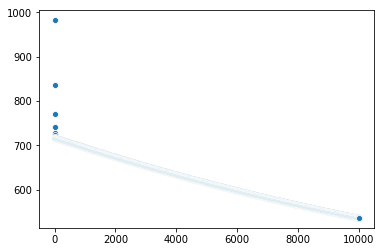

In [14]:
numEpochs= 10000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 


<img src='./resources/scalecontour.png' width=500 />

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise